<a href="https://colab.research.google.com/github/AnushkaBhatnagar/Python-Projects/blob/main/Research_Project_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

movies=pd.read_csv("/content/movies.csv")
ratings=pd.read_csv("/content/ratings.csv")

Following is the merged dataframe we obtain from combining movie names and their ratings (through movieId):

In [ ]:
final=pd.merge(ratings, movies, on='movieId')
final.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


The movie names are grouped by the average of their total ratings on a scale of 5, and sorted in descending order as follows:

In [ ]:
final.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

The above data gives us the average ratings for each movie. However, this way, a movie can top the list even if it has been rated in full by just one user. Thus, this can be misleading. So, we group the movies by the total 'number' of ratings each received, and are sorted in descending order. This can also be understood as the number of times a movie name occured in the dataset. For example, we see that Forrest Gump (1994) was rated by maximum number of users (329):

In [ ]:
final.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

We create a dataframe that contains both the attributes (average ratings and number of ratings):

In [ ]:
MeanVoteCount=pd.DataFrame(final.groupby('title')['rating'].mean())
MeanVoteCount['rating_counts'] = pd.DataFrame(final.groupby('title')['rating'].count())
MeanVoteCount.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


We are plotting a histogram for the number of ratings. From the following output we can see that majority of the movies have received less than 50 ratings, while very few have received over 100 ratings:

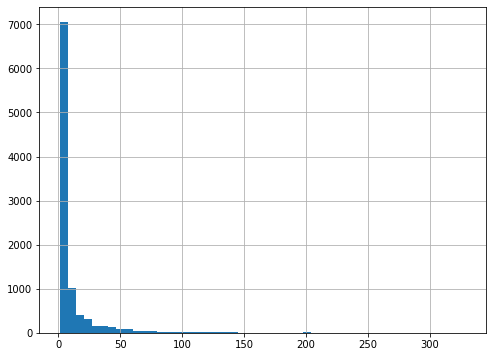

In [ ]:
plt.figure(figsize=(8,6))
MeanVoteCount['rating_counts'].hist(bins=50)

We are plotting a histogram for average ratings. From the following output we can see that there may be outliers in our data as it seems to have a weak normal distribution:

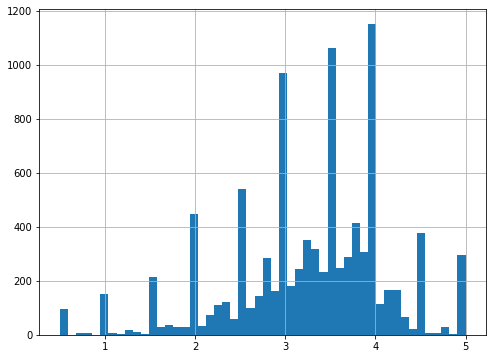

In [ ]:
plt.figure(figsize=(8,6))
MeanVoteCount['rating'].hist(bins=50)

The plot below shows us that movies with average higher ratings have more 'number' of ratings as well. A well-rated and well-known movie is generally watched by more number of people.

<Figure size 576x432 with 0 Axes>

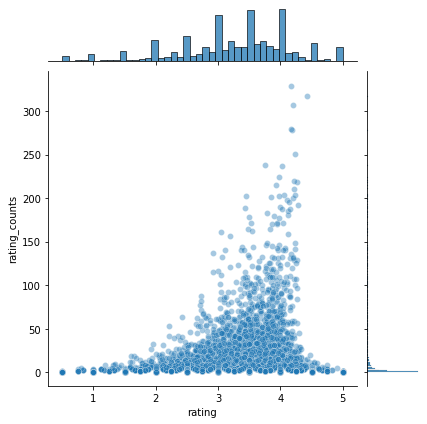

In [ ]:
import seaborn
plt.figure(figsize=(8,6))
seaborn.jointplot(x='rating', y='rating_counts', data=MeanVoteCount, alpha=0.4)

Below, when the user enters a movie name, top-10 matches for the movie are shown, along with the number of voters it has. The correlation for each movie basically represents the percentage match. For instance, correlation of 1.00 translates that this movie and the movie entered by the user match by 100%:

In [ ]:
userrating=final.pivot_table(index='userId', columns='title', values='rating')
f=input('Enter a Movie Name: ')
try:
    userrating= userrating[userrating.get(f).notnull()]
    if(len(userrating)==1):
        print('Sorry! Data available with us is insufficient to make a recommendation for the entered movie.')
    else:
        userrating= userrating.dropna(axis='columns', thresh=2)
        relatedmovies=userrating.corrwith(userrating[f])
        cor=pd.DataFrame(relatedmovies, columns=['Correlation'])
        cor.dropna(inplace=True)
        cor=cor.sort_values('Correlation', ascending=False)
        cor=cor.join(MeanVoteCount['rating_counts'])
        cor=cor[cor['rating_counts']>50].sort_values('Correlation', ascending=False)
        print("\nRecommended Movies based your entered choice are:\n")
        print(cor.head(10))
except:
    print('Sorry! Movie entered is not available with us.')

Enter a Movie Name: Million Dollar Baby (2004)

Recommended Movies based your entered choice are:

                            Correlation  rating_counts
title                                                 
Million Dollar Baby (2004)     1.000000             52
In the Line of Fire (1993)     0.827349             70
Grosse Pointe Blank (1997)     0.818388             59
Notting Hill (1999)            0.779370             56
Election (1999)                0.771969             56
Army of Darkness (1993)        0.767141             51
High Fidelity (2000)           0.744291             75
Up (2009)                      0.729494            105
Jumanji (1995)                 0.716712            110
Pretty Woman (1990)            0.705978            135
